In [10]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [27]:
df = pd.read_table(
    "http://people.sc.fsu.edu/~jburkardt/datasets/regression/x01.txt",
    sep='\s+',
    skiprows=33,
    names=['id', 'brain', 'body'],
    index_col='id')
df.to_excel("brains_weight.xlsx",index=False)

In [28]:
df = pd.read_excel("brains_weight.xlsx")
df.head()

,brain,body
0,3.385,44.5
1,0.480,15.5
2,1.350,8.1
3,465.000,423.0
4,36.330,119.5


In [4]:
df.shape

(62, 2)

In [5]:
df=df[df.body<200]

In [6]:
df.shape

(51, 2)

(-10, 250)

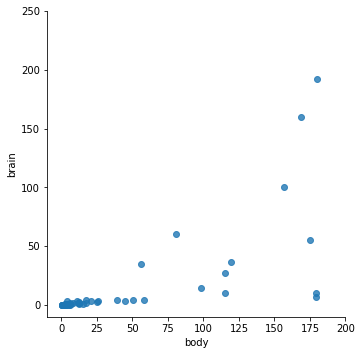

In [11]:
sns.lmplot(x='body',y='brain',data=df,ci=None,fit_reg=False)
plt.xlim(-10,200)
plt.ylim(-10,250)

(-10, 250)

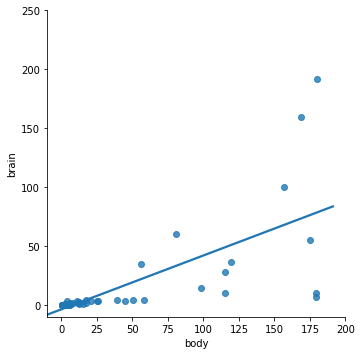

In [12]:
sns.lmplot(x='body',y='brain',data=df,ci=None,fit_reg=True)
plt.xlim(-10,200)
plt.ylim(-10,250)

In [13]:
np.random.seed(12345)
df['sample']=np.random.randint(1,3,len(df))

In [14]:
df.head()

,brain,body,sample
id,,,
1,3.385,44.5,1
2,0.480,15.5,2
3,1.350,8.1,2
5,36.330,119.5,2
6,27.660,115.0,1


In [20]:
df.groupby('sample')['brain','body'].mean()

,brain,body
sample,,
1,18.113778,52.068889
2,13.323364,34.669091


(-10, 250)

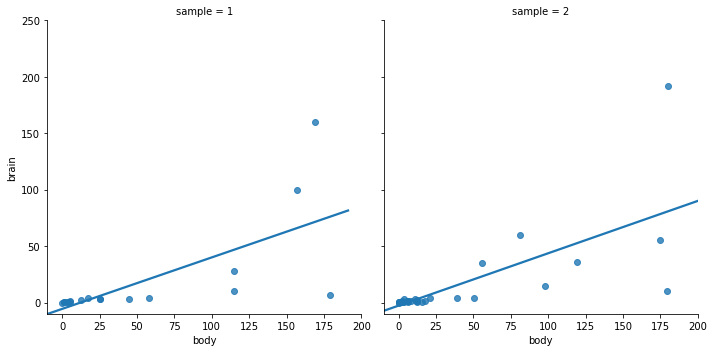

In [21]:
sns.lmplot(x='body',y='brain',data=df,ci=None,fit_reg=True,col='sample')
plt.xlim(-10,200)
plt.ylim(-10,250)

(-10, 250)

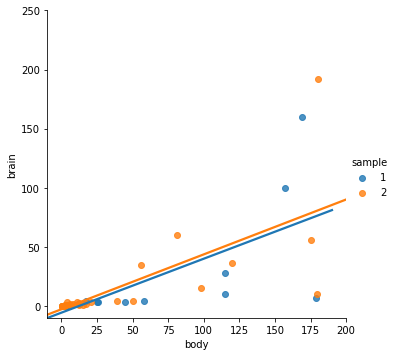

In [22]:
sns.lmplot(x='body',y='brain',data=df,ci=None,fit_reg=True,hue='sample')
plt.xlim(-10,200)
plt.ylim(-10,250)

(-10, 250)

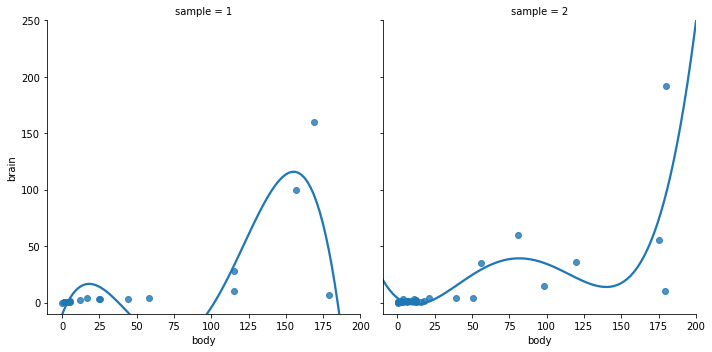

In [23]:
sns.lmplot(x='body',y='brain',data=df,ci=None,fit_reg=True,col='sample',order=4)
plt.xlim(-10,200)
plt.ylim(-10,250)

(-10, 250)

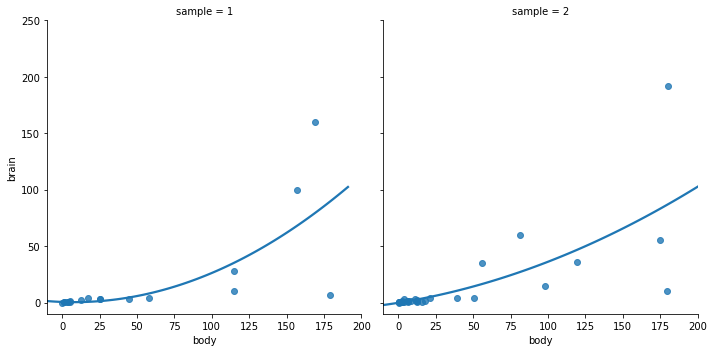

In [26]:
sns.lmplot(x='body',y='brain',data=df,ci=None,fit_reg=True,col='sample',order=2)
plt.xlim(-10,200)
plt.ylim(-10,250)

In [32]:
df = pd.read_excel("brains_weight.xlsx",index=False)

In [37]:
df= df[df.brain<300][df.body<500]
nFolds=5

In [43]:
from sklearn.model_selection import KFold
kf= KFold(n_splits=nFolds,shuffle=True)

<generator object _BaseKFold.split at 0x1a357b81d0>

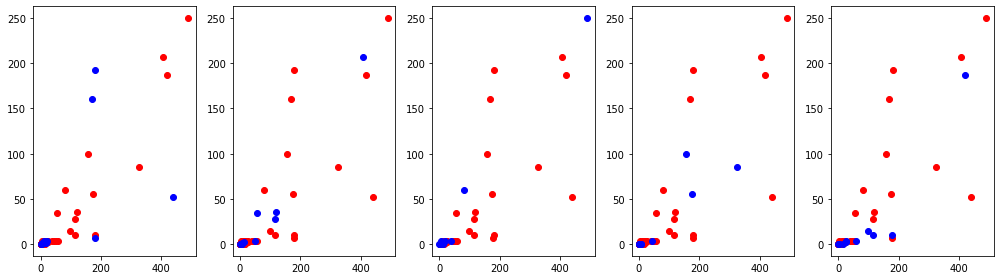

In [46]:
fig,axes=plt.subplots(1,nFolds,figsize=(14,4))
for i,fold in enumerate(kf.split(df)):
    training,validation =fold
    x,y=df.iloc[training]['body'],df.iloc[training]['brain']
    axes[i].plot(x,y,'ro')
    x,y=df.iloc[validation]['body'],df.iloc[validation]['brain']
    axes[i].plot(x,y,'bo')
plt.tight_layout()